In [17]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import folium
from scipy.signal import find_peaks
import matplotlib.pyplot as plt


In [24]:
# Loading GPS and acceleration data from CSV files
gps_data = pd.read_csv('gps_data.csv')
acceleration_data = pd.read_csv('acceleration_data.csv')


In [25]:
# Sorting both GPS and acceleration data by seconds_elapsed for chronological analysis
gps_data.sort_values(by='seconds_elapsed', inplace=True)
acceleration_data.sort_values(by='seconds_elapsed', inplace=True)

# Printing column names to verify data structure
print("GPS Data Columns:", gps_data.columns.tolist())
print("Acceleration Data Columns:", acceleration_data.columns.tolist())


GPS Data Columns: ['Unnamed: 0', 'seconds_elapsed', 'longitude', 'latitude']
Acceleration Data Columns: ['Unnamed: 0', 'seconds_elapsed', 'z', 'y', 'x']


In [26]:
# Creating a map to visualize the movement path using GPS coordinates
map_center = gps_data[['latitude', 'longitude']].mean().values.tolist()
m = folium.Map(location=map_center, zoom_start=15)
folium.PolyLine(gps_data[['latitude', 'longitude']].values, color="red", weight=2.5, opacity=1).add_to(m)
m


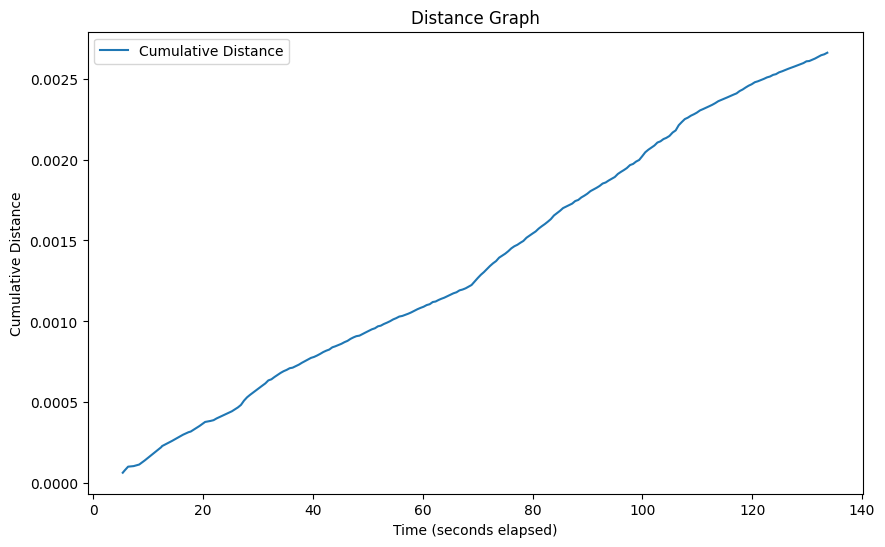

In [27]:
# Calculating cumulative distance traveled and plotting it over time.
gps_data['distance'] = np.sqrt((gps_data['latitude'].diff())**2 + (gps_data['longitude'].diff())**2)
gps_data['cumulative_distance'] = gps_data['distance'].cumsum()
plt.figure(figsize=(10, 6))
plt.plot(gps_data['seconds_elapsed'], gps_data['cumulative_distance'], label='Cumulative Distance')
plt.xlabel('Time (seconds elapsed)')
plt.ylabel('Cumulative Distance')
plt.title('Distance Graph')
plt.legend()
plt.show()


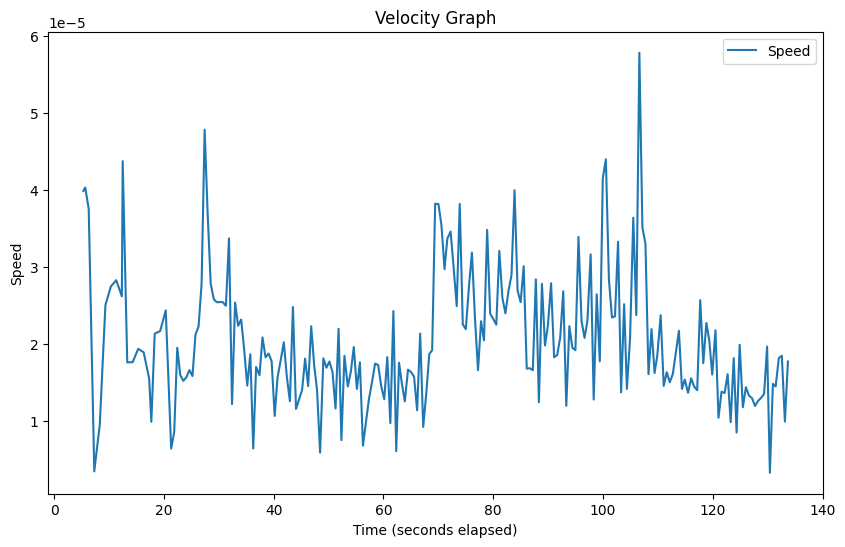

In [28]:
# Calculating velocity from GPS coordinates and plotting the velocity graph over time
gps_data['speed'] = gps_data['distance'] / gps_data['seconds_elapsed'].diff()
plt.figure(figsize=(10, 6))
plt.plot(gps_data['seconds_elapsed'], gps_data['speed'], label='Speed')
plt.xlabel('Time (seconds elapsed)')
plt.ylabel('Speed')
plt.title('Velocity Graph')
plt.legend()
plt.show()


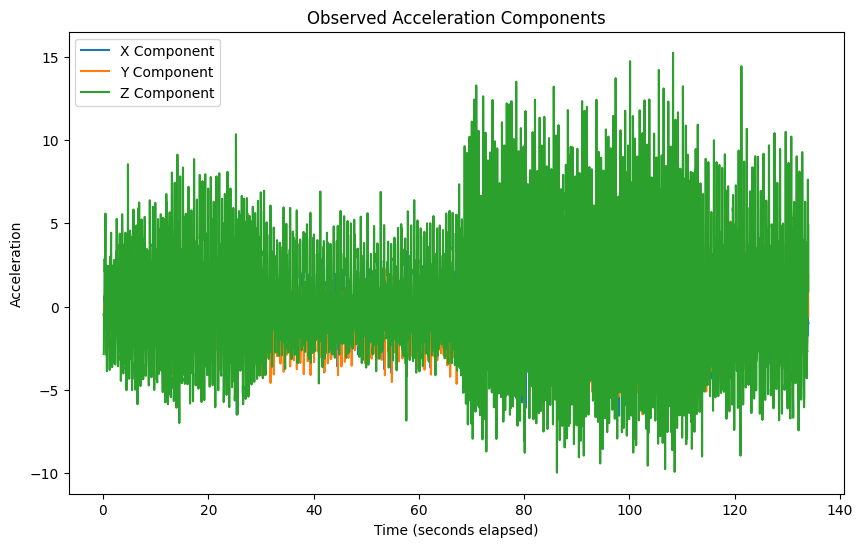

In [29]:
# Plotting observed acceleration components (X, Y, Z) over time to analyze fluctuations
plt.figure(figsize=(10, 6))
plt.plot(acceleration_data['seconds_elapsed'], acceleration_data['x'], label='X Component')
plt.plot(acceleration_data['seconds_elapsed'], acceleration_data['y'], label='Y Component')
plt.plot(acceleration_data['seconds_elapsed'], acceleration_data['z'], label='Z Component')
plt.xlabel('Time (seconds elapsed)')
plt.ylabel('Acceleration')
plt.title('Observed Acceleration Components')
plt.legend()
plt.show()


The number of steps is: 770
